<a href="https://colab.research.google.com/github/horlahsunbo/student-grade-prediction-using-XGBoost/blob/main/shared__FinalTestDataset6_with_stft_MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import signal
import scipy.io
import pickle
import glob
import os, os.path
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def mode(p):
  return int(np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=p))

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [5]:
!wget https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
!tar -xzvf WISDM_ar_latest.tar.gz

--2022-05-02 16:49:39--  https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
Resolving www.cis.fordham.edu (www.cis.fordham.edu)... 150.108.68.29
Connecting to www.cis.fordham.edu (www.cis.fordham.edu)|150.108.68.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11404612 (11M) [application/x-gzip]
Saving to: ‘WISDM_ar_latest.tar.gz’

WISDM_ar_latest.tar 100%[===================>]  10.88M  21.6MB/s    in 0.5s    

2022-05-02 16:49:39 (21.6 MB/s) - ‘WISDM_ar_latest.tar.gz’ saved [11404612/11404612]

WISDM_ar_v1.1/
WISDM_ar_v1.1/readme.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_raw_about.txt
WISDM_ar_v1.1/WISDM_ar_v1.1_transformed.arff
WISDM_ar_v1.1/WISDM_ar_v1.1_trans_about.txt


In [6]:
df = pd.read_csv('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', header=None, error_bad_lines=False).replace({';',''})
df.dropna(inplace=True)
df = df.iloc[:,[1, 3,4,5]]
df.iloc[:, -1] = df.iloc[:, -1].str.replace(';','')

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.iloc[:, 0] = le.fit_transform(df.iloc[:, 0])

xtrained = df[[3,4,5]].to_numpy().astype(float)
ytrained = df[[1]].to_numpy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 134634: expected 6 fields, saw 11\nSkipping line 197687: expected 6 fields, saw 11\n'
b'Skipping line 273261: expected 6 fields, saw 11\nSkipping line 371932: expected 6 fields, saw 11\n'
b'Skipping line 711484: expected 6 fields, saw 11\n'
b'Skipping line 832903: expected 6 fields, saw 7\nSkipping line 832904: expected 6 fields, saw 7\nSkipping line 832905: expected 6 fields, saw 7\nSkipping line 832906: expected 6 fields, saw 7\nSkipping line 832907: expected 6 fields, saw 7\nSkipping line 832908: expected 6 fields, saw 7\nSkipping line 832909: expected 6 fields, saw 7\nSkipping line 832910: expected 6 fields, saw 7\nSkipping line 832911: expected 6 fields, saw 7\nSkipping line 832912: expected 6 fields, saw 7\nSkipping line 832913: ex

In [7]:
xtrained.shape, ytrained.shape

((1086465, 3), (1086465, 1))

In [8]:
labels = dict(zip(le.classes_, le.transform(le.classes_)))

In [9]:
ALL_X_TIME = []
ALL_X_FREQ = []
ALL_Y = []

window_size = 128
jump_size = 64

for i in range(0, len(xtrained) - window_size, jump_size):
  X_batch = xtrained[i: window_size + i]
  y_batch = mode(ytrained[i: window_size + i])  
  Freq_batch = np.array([signal.stft(X_batch[:, i], nperseg=6)[2] for i in range(3)]).T

  ALL_X_TIME.append(X_batch)
  ALL_X_FREQ.append(Freq_batch)
  ALL_Y.append(y_batch)
    
X_time = np.array(ALL_X_TIME)
X_freq = np.array(ALL_X_FREQ)
y = np.array(ALL_Y)

X_time.shape, X_freq.shape, y.shape

((16975, 128, 3), (16975, 44, 4, 3), (16975,))

In [10]:
!head WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt

33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286;
33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172;
33,Jogging,49106332290000,-1.1849703,12.108489,7.205164;
33,Jogging,49106442306000,1.3756552,-2.4925237,-6.510526;
33,Jogging,49106542312000,-0.61291564,10.56939,5.706926;
33,Jogging,49106652389000,-0.50395286,13.947236,7.0553403;
33,Jogging,49106762313000,-8.430995,11.413852,5.134871;
33,Jogging,49106872299000,0.95342433,1.3756552,1.6480621;


In [11]:
X_time_train, X_time_test, X_freq_train, X_freq_test, y_train, y_test = train_test_split(X_time, X_freq, y, stratify=y, random_state=0, test_size = 0.3)
X_time_train.shape, X_time_test.shape, X_freq_train.shape, X_freq_test.shape, y_train.shape, y_test.shape

((11882, 128, 3),
 (5093, 128, 3),
 (11882, 44, 4, 3),
 (5093, 44, 4, 3),
 (11882,),
 (5093,))

In [12]:
with open('dataset61.pkl', 'wb') as outp:
  data = [X_time_train, X_time_test, X_freq_train, X_freq_test, y_train, y_test, labels]
  pickle.dump(data, outp)
!cp -i dataset61.pkl /content/drive/MyDrive
!ls -ltrh dataset61.pkl

cp: overwrite '/content/drive/MyDrive/dataset61.pkl'? y
-rw-r--r-- 1 root root 187M May  2 16:50 dataset61.pkl


In [13]:
with open('dataset6.pkl', 'wb') as outp:
  data = [X_time_train, X_time_test, X_freq_train, X_freq_test, y_train, y_test, labels]
  pickle.dump(data, outp)
!cp -i dataset6.pkl /content/drive/MyDrive
!ls -ltrh dataset6.pkl

cp: overwrite '/content/drive/MyDrive/dataset6.pkl'? y
-rw-r--r-- 1 root root 187M May  2 16:50 dataset6.pkl


In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import glob
import pickle

from sklearn.metrics import classification_report, roc_auc_score, f1_score, confusion_matrix
from sklearn.utils import class_weight

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
with open('/content/drive/MyDrive/dataset6.pkl', 'rb') as outp:
  data = pickle.load(outp)
  X_time_train, X_time_test, X_freq_train, X_freq_test, y_train, y_test, datalabels = data

X_freq_train, X_freq_test = np.real(X_freq_train), np.real(X_freq_test)

In [17]:
X_time_train.shape, X_freq_train.shape, y_train.shape, np.unique(y_train), np.unique(y_test)

((11882, 128, 3),
 (11882, 44, 4, 3),
 (11882,),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5]))

In [18]:
y_test.shape

(5093,)

In [19]:
datalabels

{'Downstairs': 0,
 'Jogging': 1,
 'Sitting': 2,
 'Standing': 3,
 'Upstairs': 4,
 'Walking': 5}

In [20]:
labels=y_train.flatten()
labels_unique = np.unique(labels)
class_weights =class_weight.compute_class_weight('balanced', classes=labels_unique,  y=labels)
class_weights = dict(zip(labels_unique, class_weights))
class_weights

{0: 1.8035822707953855,
 1: 0.5382803297997645,
 2: 3.023409669211196,
 3: 3.750631313131313,
 4: 1.4690900098911968,
 5: 0.43295437982801344}

In [21]:
def time_domain_network(input_shape_time):
  time_domain = keras.Sequential(
    [
        keras.Input(shape=input_shape_time),
        layers.Conv1D(30, kernel_size=(16, ), activation="relu", padding='same'),
        layers.Conv1D(60, kernel_size=(16, ), activation="relu", padding='same'),
        #layers.MaxPooling1D(pool_size=(3, )),
        # layers.Conv1D(100, kernel_size=(7, ), activation="relu", padding='same'),
        # layers.Conv1D(160, kernel_size=(9, ), activation="relu"),
        layers.GlobalAveragePooling1D(),
        layers.Dropout(0.5),
        layers.Flatten(),
    ]
  )
  time_domain.summary()
  return time_domain

def frequency_domain_network(input_shape_frequency):
  frequency_domain = keras.Sequential(
    [
        keras.Input(shape=input_shape_frequency),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
    
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding='same'),
        layers.BatchNormalization(),
        #layers.MaxPooling2D(pool_size=(2, 2)),
    
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same'),     
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Dropout(0.5),
        layers.Flatten(),
    ]
  )
  frequency_domain.summary()
  return frequency_domain

def network(input_shape_time, input_shape_frequency, output_shape):
  time_domain = time_domain_network(input_shape_time)
  frequency_domain = frequency_domain_network(input_shape_frequency)
  model_concat = layers.concatenate([time_domain.output, frequency_domain.output], axis=-1)
  model_concat = layers.Dense(output_shape, activation='softmax')(model_concat)
  model = keras.Model(inputs=[time_domain.input, frequency_domain.input], outputs=model_concat)
  return model

In [22]:
input_shape_time = X_time_train.shape[1:]
input_shape_frequency = X_freq_train.shape[1:]
output_shape = len(np.unique(y_train))

In [23]:
def train(X_time, X_freq, y, class_weights, batch_size = 500, epochs = 150):
  callback = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
  model = network(X_time.shape[1:], X_freq.shape[1:], len(np.unique(y_train)))
  model.compile(loss="categorical_crossentropy", optimizer="adam",
                metrics=[tf.keras.metrics.AUC()])
  y_onehot = tf.keras.utils.to_categorical(y.flatten())
  model.fit([X_time, X_freq], y_onehot, verbose=1, batch_size=batch_size,
            epochs=epochs, class_weight=class_weights, callbacks=[callback],
            validation_split=0.1)
  return model

In [24]:
train(X_time_train,X_freq_train,y_train, class_weights,epochs=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128, 30)           1470      
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 60)           28860     
                                                                 
 global_average_pooling1d (G  (None, 60)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
Total params: 30,330
Trainable params: 30,330
Non-trainable params: 0
____________________________________________________

In [25]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
kf_scores_train_cnn = []
kf_scores_test_cnn = []

X_TIME_KF = np.vstack([X_time_train, X_time_test])
X_FREQ_KF = np.vstack([X_freq_train, X_freq_test])
Y_KF = np.hstack([y_train, y_test])

for i, (train_index, test_index) in enumerate(skf.split(X_TIME_KF, Y_KF), 1):
  X_time_train_kf, X_time_test_kf = X_TIME_KF[train_index], X_TIME_KF[test_index]
  X_freq_train_kf, X_freq_test_kf = X_FREQ_KF[train_index], X_FREQ_KF[test_index]
  y_train_kf, y_test_kf = Y_KF[train_index], Y_KF[test_index]
  print('###' * 20, 'Training on %dth fold' % i, '###' * 20)
  model = train(X_time_train_kf, X_freq_train_kf, y_train_kf, class_weights)

  _, score_train = model.evaluate([X_time_train_kf, X_freq_train_kf], tf.keras.utils.to_categorical(y_train_kf.flatten()))
  _, score_test = model.evaluate([X_time_test_kf, X_freq_test_kf],  tf.keras.utils.to_categorical(y_test_kf.flatten()))
  kf_scores_train_cnn.append(score_train)
  kf_scores_test_cnn.append(score_test)

kf_scores_train_cnn = np.array(kf_scores_train_cnn)
kf_scores_test_cnn = np.array(kf_scores_test_cnn)

print('auc train: %.3f\nauc  test: %.3f' % (kf_scores_train_cnn.mean(), kf_scores_test_cnn.mean()))

############################################################ Training on 1th fold ############################################################
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 128, 30)           1470      
                                                                 
 conv1d_3 (Conv1D)           (None, 128, 60)           28860     
                                                                 
 global_average_pooling1d_1   (None, 60)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 60)                0         
                                                                 
 flatten_2 (Flatten)         (None, 60)                0         
                                           

In [26]:
np.argwhere(np.isnan(X_time_train))

array([], shape=(0, 3), dtype=int64)

In [27]:
model = train(X_time_train, X_freq_train, y_train, class_weights)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 128, 30)           1470      
                                                                 
 conv1d_23 (Conv1D)          (None, 128, 60)           28860     
                                                                 
 global_average_pooling1d_11  (None, 60)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_22 (Dropout)        (None, 60)                0         
                                                                 
 flatten_22 (Flatten)        (None, 60)                0         
                                                                 
Total params: 30,330
Trainable params: 30,330
Non-trainable params: 0
_________________________________________________

In [28]:
_, auc_train = model.evaluate([X_time_train, X_freq_train], tf.keras.utils.to_categorical(y_train.flatten()))
print('auc for train data: %.3f' % auc_train)

372/372 [==============================] - 3s 7ms/step - loss: 0.0164 - auc_11: 0.9996
auc for train data: 1.000


In [29]:
_, auc_test = model.evaluate([X_time_test, X_freq_test], tf.keras.utils.to_categorical(y_test.flatten()))
print('auc for test data: %.3f' % auc_test)

160/160 [==============================] - 1s 7ms/step - loss: 0.0813 - auc_11: 0.9974
auc for test data: 0.997


In [30]:
y_pred_cnn = model.predict([X_time_test, X_freq_test]).argmax(axis=-1)
z = confusion_matrix(y_test, y_pred_cnn)
z

array([[ 429,    2,    1,    0,   28,   11],
       [   2, 1561,    0,    0,    7,    7],
       [   0,    0,  277,    4,    0,    0],
       [   1,    1,    1,  223,    0,    0],
       [  19,    8,    0,    0,  540,   10],
       [   4,    0,    0,    0,    4, 1953]])

In [31]:
(z.T / z.sum(axis=1)).round(2).T

array([[0.91, 0.  , 0.  , 0.  , 0.06, 0.02],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.99, 0.  , 0.  ],
       [0.03, 0.01, 0.  , 0.  , 0.94, 0.02],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [32]:
import numpy as np
np.unique(y_test.flatten()), np.unique(y_pred_cnn.flatten())

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [33]:
labels

array([4, 1, 1, ..., 1, 5, 4])

In [34]:
inv_labels = dict((datalabels[k], k) for k in datalabels)

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

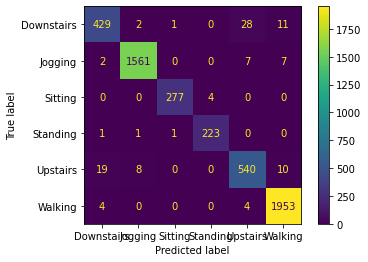

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test.flatten(), y_pred_cnn.flatten(),labels=list(inv_labels.keys()), display_labels=list(inv_labels.values()))
import numpy as np
np.unique(y_test.flatten()), np.unique(y_pred_cnn.flatten())

In [36]:
print(classification_report(y_test, y_pred_cnn, labels=list(inv_labels.keys()),target_names=list(inv_labels.values())))

              precision    recall  f1-score   support

  Downstairs       0.94      0.91      0.93       471
     Jogging       0.99      0.99      0.99      1577
     Sitting       0.99      0.99      0.99       281
    Standing       0.98      0.99      0.98       226
    Upstairs       0.93      0.94      0.93       577
     Walking       0.99      1.00      0.99      1961

    accuracy                           0.98      5093
   macro avg       0.97      0.97      0.97      5093
weighted avg       0.98      0.98      0.98      5093



In [1]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
kf_scores_train_svm = []
kf_scores_test_svm = []

X_TIME_KF = np.vstack([X_time_train, X_time_test])
X_FREQ_KF = np.vstack([X_freq_train, X_freq_test])
Y_KF = np.hstack([y_train, y_test])


for i, (train_index, test_index) in enumerate(skf.split(X_TIME_KF, Y_KF), 1):
  X_time_train_kf, X_time_test_kf = X_TIME_KF[train_index], X_TIME_KF[test_index]
  X_freq_train_kf, X_freq_test_kf = X_FREQ_KF[train_index], X_FREQ_KF[test_index]
  y_train_kf, y_test_kf = Y_KF[train_index], Y_KF[test_index]
  # print('###' * 10, 'Training on %dth fold' % i, '###' * 10)
  model = make_pipeline(StandardScaler(), SVC(class_weight=class_weights, probability=True))
  
  features1 = X_time_train_kf.reshape(len(X_time_train_kf),-1)
  features2 = X_freq_train_kf.reshape(len(X_freq_train_kf),-1)
  features = np.hstack([features1, features2])
  
  model.fit(features, y_train_kf.flatten())
  predict = model.predict_proba(features)
  kf_scores_train_svm.append(roc_auc_score(y_train_kf, predict, multi_class='ovr'))

  features1 = X_time_test_kf.reshape(len(X_time_test_kf),-1)
  features2 = X_freq_test_kf.reshape(len(X_freq_test_kf),-1)
  features = np.hstack([features1, features2])
  predict = model.predict_proba(features)
  kf_scores_test_svm.append(roc_auc_score(y_test_kf, predict, multi_class='ovr'))

kf_scores_train_svm = np.array(kf_scores_train_svm)
kf_scores_test_svm = np.array(kf_scores_test_svm)

print('auc train: %.3f\nauc  test: %.3f' % (kf_scores_train_svm.mean(), kf_scores_test_svm.mean()))

NameError: ignored

In [ ]:

model = make_pipeline(StandardScaler(), SVC(class_weight=class_weights, probability=True))

features1 = X_time_train.reshape(len(X_time_train),-1)
features2 = X_freq_train.reshape(len(X_freq_train),-1)
features = np.hstack([features1, features2])

model.fit(features, y_train.flatten())

features1 = X_time_test.reshape(len(X_time_test),-1)
features2 = X_freq_test.reshape(len(X_freq_test),-1)
features = np.hstack([features1, features2])

predict_proba = model.predict_proba(features)
y_pred_svm = model.predict(features)
auc_test = roc_auc_score(y_test, predict_proba, multi_class='ovr')
print('auc for test data: %.3f' % auc_test)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.flatten(), y_pred_svm,labels=list(inv_labels.keys()), display_labels=list(inv_labels.values()))

In [ ]:
z = confusion_matrix(y_test.flatten(), y_pred_svm)
z

In [ ]:
(z.T/z.sum(axis=1)).T.round(2)

In [ ]:
print(classification_report(y_test, y_pred_svm, labels=list(inv_labels.keys()),target_names=list(inv_labels.values())))

In [ ]:
1# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
 
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 
# seed the random number generator
seed(1)
# generate two independent samples
data1 = kf_scores_test_cnn
data2 = kf_scores_test_svm
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')